# DATASET DESCRIPTION 
Of all the universities in the world, which are the best?

Ranking universities is a difficult, political, and controversial practice. There are hundreds of different national and international university ranking systems, many of which disagree with each other. This dataset contains three global university rankings from very different places.

## University Ranking Data
The **Times Higher Education World University Ranking** is widely regarded as one of the most influential and widely observed university measures. Founded in the United Kingdom in 2010, it has been criticized for its commercialization and for undermining non-English-instructing institutions.

The **Academic Ranking of World Universities, also known as the Shanghai Ranking**, is an equally influential ranking. It was founded in China in 2003 and has been criticized for focusing on raw research power and for undermining humanities and quality of instruction.

The **Center for World University Rankings**, is a less well know listing that comes from Saudi Arabia, it was founded in 2012.

- How do these rankings compare to each other?
- Are the various criticisms levied against these rankings fair or not?
- How does your alma mater fare against the world?  

## Supplementary Data
To further extend your analyses, we've also included two sets of supplementary data.

The first of these is a set of data on educational attainment around the world. It comes from The World Data Bank and comprises information from the UNESCO Institute for Statistics and the Barro-Lee Dataset. How does national educational attainment relate to the quality of each nation's universities?

The second supplementary dataset contains information about public and private direct expenditure on education across nations. This data comes from the National Center for Education Statistics. It represents expenditure as a percentage of gross domestic product. Does spending more on education lead to better international university rankings?

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# plot
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
# You can also plot your graphs offline inside a Jupyter Notebook Environment. 
# First you need to initiate the Plotly Notebook mode as below
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os 
print(os.listdir('./input/'))
# Any results you write to the current directory are saved as output.

['cwurData.csv', 'educational_attainment_supplementary_data.csv', 'education_expenditure_supplementary_data.csv', 'school_and_country_table.csv', 'shanghaiData.csv', 'timesData.csv', 'world-university-rankings.zip']


## Loading Data and Explanation of Features
- timesData includes 14 features that are:
    - world_rank
    - university_name
    - country
    - teaching
    - international
    - research
    - citations 引用
    - income
    - total_score
    - num_students
    - student_staff_ratio
    - international_students
    - female_male_ratio
    - year

In [2]:
# Load data that we will use.
timeData = pd.read_csv('./input/timesData.csv')

In [3]:
# information about timesData
timeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null object
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null object
total_score               2603 non-null object
num_students              2544 non-null object
student_staff_ratio       2544 non-null float64
international_students    2536 non-null object
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 284.8+ KB


In [4]:
timeData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


## Line Charts
Line Charts Example: Citation and Teaching vs World Rank of Top 100 Universities       

- Import graph_objs as go
- Creating traces
    - x = x axis
    - y = y axis
    - mode = type of plot like marker, line or line + markers
    - name = name of the plots
    - marker = marker is used with dictionary.
        - color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
    - text = The hover text (hover is curser游标)
- data = is a list that we add traces into it
- layout = it is dictionary.
    - title = title of layout
    - x axis = it is dictionary
        - title = label of x axis
        - ticklen = length of x axis ticks刻度
        - zeroline = showing zero line or not
- fig = it includes data and layout
- iplot() = plots the figure(fig) that is created by data and layout

In [5]:
# prepare data frame
df = timeData.iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go

# creating trace1
trace1 = go.Scatter(
    x = df.world_rank,
    y = df.citations,
    mode = 'lines',
    name = 'citations',
    marker = dict(color='rgba(16,112,2,0.8)'),
    text = df.university_name
)

# creating trace2
trace2 = go.Scatter(
    x = df.world_rank,
    y = df.teaching,
    mode = 'lines+markers',
    name = 'teaching',
    marker = dict(color='rgba(80,26,80,0.8)'),
    text = df.university_name
)

data = [trace1, trace2]
layout = dict(title='Citation and Teaching vs World Rank of Top 100 Universities',
              xaxis=dict(title='World Rank', ticklen=5, zeroline=False))
              #,yaxis=dict(title='Citations', ticklen=5, zeroline=False))
fig = dict(data=data, layout=layout)
iplot(fig)

**iplot(fig)不现实输出，空白一片解决办法：**
It may be worth a try starting with an increased data rate limit.
在cmd输入： jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

## Scatter
Scatter Example: Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years   

- Import graph_objs as go
- Creating traces
    - x = x axis
    - y = y axis
    - mode = type of plot like marker, line or line + markers
    - name = name of the plots
    - marker = marker is used with dictionary.
        - color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
    - text = The hover text (hover is curser)
- data = is a list that we add traces into it
- layout = it is dictionary.
    - title = title of layout
    - x axis = it is dictionary
        - title = label of x axis
        - ticklen = length of x axis ticks
        - zeroline = showing zero line or not
    - y axis = it is dictionary and same with x axis
- fig = it includes data and layout
- iplot() = plots the figure(fig) that is created by data and layout

In [6]:
# prepare data frames
d2014 = timeData[timeData.year == 2014].iloc[:100,:]
d2015 = timeData[timeData.year == 2015].iloc[:100,:]
d2016 = timeData[timeData.year == 2016].iloc[:100,:]

import plotly.graph_objs as go

trace1 = go.Scatter(
    x = d2014.world_rank,
    y = d2014.citations,
    mode = 'markers',
    name = '2014',
    marker = dict(color='rgba(70,80,90,0.8)'), 
    text = d2014.university_name
)
    
trace2 = go.Scatter(
    x = d2015.world_rank,
    y = d2015.citations,
    mode = 'lines',
    name = '2015',
    marker = dict(color='rgba(30,180,10,0.8)'), 
    text = d2015.university_name
)
    
trace3 = go.Scatter(
    x = d2016.world_rank,
    y = d2016.citations,
    mode = 'lines+markers',
    name = '2016',
    marker = dict(color='rgba(20,10,20,0.8)'), 
    text = d2016.university_name
)

data = [trace1, trace2, trace3]
layout = dict(title='Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis=dict(title='World Rank', ticklen=5, zeroline=False))
fig = dict(data=data, layout=layout)
iplot(fig)

## Bar Charts
First Bar Charts Example: citations and teaching of top 3 universities in 2014 (style1)   

- Import graph_objs as go
- Creating traces
    - x = x axis
    - y = y axis
    - mode = type of plot like marker, line or line + markers
    - name = name of the plots
    - marker = marker is used with dictionary.
        - color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
        - line = It is dictionary. line between bars
            - color = line color around bars
    - text = The hover text (hover is curser)
- data = is a list that we add traces into it
- layout = it is dictionary.
    - barmode = bar mode of bars like grouped
- fig = it includes data and layout
- iplot() = plots the figure(fig) that is created by data and layout

In [7]:
# prepare data frames
df2014 = timeData[timeData.year == 2014].iloc[:3,:]
df2014

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014


In [8]:
# import graph objects as "go"
import plotly.graph_objs as go
# cerate trace1
trace1 = go.Bar(
    x = df2014.university_name,
    y = df.teaching,
    name = 'teaching',
    marker = dict(color='rgba(255,225,125,0.5)',
                  line=dict(color='rgb(0,0,0)', width=1.5)),
    text = df2014.country
)
#rgb(0,0,0)黑色
trace2 = go.Bar(
    x = df2014.university_name,
    y = df.citations,
    name = 'citations',
    marker = dict(color='rgba(255,173,255,0.5)',
                  line=dict(color='rgb(0,0,0)', width=1.5)),
    text = df2014.country
)

data = [trace1, trace2]
layout = go.Layout(barmode='group') # 注意和散点图不一样
fig = dict(data=data, layout=layout)
# fig = go.Figure(data = data, layout = layout) 和上面一样
iplot(fig)

Second Bar Charts Example: citations and teaching of top 3 universities in 2014 (style2) 
Actually, if you change only the barmode from group to relative in previous example, you achieve what we did here. However, for diversity I use different syntaxes.    
 
- Import graph_objs as go
- Creating traces
    - x = x axis
    - y = y axis
    - name = name of the plots
    - type = type of plot like bar plot
- data = is a list that we add traces into it
- layout = it is dictionary.
    - xaxis = label of x axis
    - barmode = bar mode of bars like grouped( previous example) or relative
    - title = title of layout
- fig = it includes data and layout
- iplot() = plots the figure(fig) that is created by data and layout

In [9]:
# 两种写法
# prepare data frames
df2014 = timeData[timeData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go

x = df2014.university_name

trace1 = {
    'x' : x,
    'y' : df2014.citations,
    'name' : 'citation',
    'type' : 'bar'
};
trace2 = {
    'x' : x,
    'y' : df2014.teaching,
    'name' : 'teaching',
    'type' : 'bar'
};
data = [trace1, trace2]
layout = {
    'xaxis' : {'title' : 'Top 3 universities'},
    'barmode' : 'relative',
    'title' : 'citations and teaching of top 3 universities in 2014'
};
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Third Bar Charts Example: Horizontal bar charts. (style3) Research vs income for universities         

- Import graph_objs as go and importing tools
    - Tools: used for subplots
- Creating trace1
    - bar: bar plot
        - x = x axis
        - y = y axis
        - marker
            - color: color of bars
            - line: bar line color and width
        - name: name of bar
        - orientation: orientation like horizontal
            - creating trace2
            - scatter: scatter plot
                - x = x axis
                - y = y axis
                - mode: scatter type line line + markers or only markers
                - line: properties of line
                    - color: color of line
                - name: name of scatter plot
- layout: axis, legend, margin, paper and plot properties *

In [10]:
# import graph objects as "go" and import tools
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
# prepare data frames
df2016 = timeData[timeData.year == 2016].iloc[:7,:]

# 这四个变量有何用？
y_saving = [each for each in df2016.research]
y_net_worth = [float(each) for each in df2016.income]
x_saving = [each for each in df2016.university_name]
x_net_worth = [each for each in df2016.university_name]

trace0 = go.Bar(
    x = y_saving,
    y = x_saving,
    marker = dict(color='rgba(171,50,96,0.6)',
                line=dict(color='rgba(171,50,96,1.0)', width=1)),
    name = 'research',
    orientation = 'h'
)

trace1 = go.Scatter(
    x = y_net_worth,
    y = x_net_worth,
    mode = 'lines+markers',
    line = dict(color='rgb(63,72,204)'),
    name = 'income'
)

layout = dict(
    title = 'Research and income',
    yaxis = dict(showticklabels=True, domain=[0, 0.9]),    # domain 定义域设置 range:0-1
    yaxis2 = dict(showline=True, showticklabels=False,
                  linecolor='rgba(102,102,102,0.8)',
                  linewidth=2, domain=[0, 0.9]),
    xaxis = dict(zeroline=True, showline=False, linewidth=2,
                 showticklabels=True, showgrid=True,domain=[0, 0.5]),
    xaxis2 = dict(zeroline=False, showline=False, 
                 showticklabels=True, showgrid=True,
                 domain=[0.5, 1], side='top', dtick=25),
    legend = dict(x=0.029, y=1.038, font=dict(size=10)),
    margin = dict(l=200, r=20, t=70, b=70),
    paper_bgcolor = 'rgb(248, 248, 255)',
    plot_bgcolor = 'rgb(248, 248 ,255)'
)

annotations = []
# 四舍五入
y_s = np.round(y_saving, decimals=2)  # research  decimals=2 小数位数
y_nw = np.rint(y_net_worth) # income   Round elements of the array to the nearest integer.

# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x_saving):
    # labeling the scatter savings
    # zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn-4,  # x=ydn-4 控制数字标注的位置
                            text='{:,}'.format(ydn), font=dict(
                            family='Arial', size=12,
                            color='rgb(63,72,204)'), showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd+4,
                            text=str(yd), font=dict(family='Arial',
                            size=12, color='rgb(171,50,96)'), showarrow=False))
    
layout['annotations'] = annotations
    
# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{},{}]], shared_xaxes=True,
                              shared_yaxes=False, vertical_spacing=0.1)
# The number of columns in 'specs' must be equal to 'cols'
    
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



## 上面看懂了再继续！
domain [required=False] (value=number array of length 2):
- Sets the domain of this x-axis; that is, the available space for
- this x-axis to live in. Domain coordinates are given in normalized
- coordinates with respect to the paper.

## Pie Charts
Pie Charts Example: Students rate of top 7 universities in 2016   
- fig: create figures
    - data: plot type
        - values: values of plot
        - labels: labels of plot
        - name: name of plots
        - hoverinfo: information in hover
        - hole: hole width
        - type: plot type like pie
    - layout: layout of plot
        - title: title of layout
        - annotations: font, showarrow, text, x, y

In [30]:
# data preparation
df2016 = timeData[timeData.year == 2016].iloc[:7,:]
pie1 = df2016.num_students
pie1_list = [float(each.replace(',','.')) for each in df2016.num_students]
# str(2,4) => str(2.4) = > float(2.4) = 2.4
labels = df2016.university_name

# figure
fig = {
    'data' : [
        {
            'values' : pie1_list,
            'labels' : labels,
            'domain' : {'x' : [0, .45]},
            'name' : 'Number of Student Rates',
            'hoverinfo' : 'label+percent+name',
            'hole' : .3,
            'type' : 'pie'
        },
    ],
    'layout' : {
        'title' : 'Universities Number of Sutdents rates',
        'annotations' : [   # 标注
            {
                'font' : {'size' : 20},
                'showarrow' : False,
                'text' : 'Number of Students',
                'x' : 0.10,
                'y' : 1
            },
        ]
    }
}
iplot(fig)

## Bubble Charts
Bubble Charts Example: University world rank (first 20) vs teaching score with number of students(size) and international score (color) in 2016     
- x = x axis
- y = y axis
- mode = markers(scatter)
- marker = marker properties
    - color = third dimension of plot. Internaltional score
    - size = fourth dimension of plot. Number of students
- text: university names

In [31]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 1803 to 1809
Data columns (total 14 columns):
world_rank                7 non-null object
university_name           7 non-null object
country                   7 non-null object
teaching                  7 non-null float64
international             7 non-null object
research                  7 non-null float64
citations                 7 non-null float64
income                    7 non-null object
total_score               7 non-null object
num_students              7 non-null object
student_staff_ratio       7 non-null float64
international_students    7 non-null object
female_male_ratio         6 non-null object
year                      7 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 840.0+ bytes


In [32]:
# data preparation
df2016 = timeData[timeData.year == 2016].iloc[:20,:]
num_students_size = [float(each.replace(',','.')) for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]

data = [
    {
        'y' : df2016.teaching,
        'x' : df2016.world_rank,
        'mode' : 'markers',
        'marker' : {
            'color' : international_color,
            'size' : num_students_size,
            'showscale' : True
        },
        'text' : df2016.university_name
    }
]
iplot(data)

## Histogram
Lets look at histogram of students-staff ratio in 2011 and 2012 years.  
- trace1 = first histogram
    - x = x axis
    - y = y axis
    - opacity = opacity of histogram
    - name = name of legend
    - marker = color of histogram
- trace2 = second histogram
- layout = layout
    - barmode = mode of histogram like overlay. Also you can change it with stack

In [34]:
# prepare data
df2011 = timeData.student_staff_ratio[timeData.year == 2011]
df2012 = timeData.student_staff_ratio[timeData.year == 2012]

trace1 = go.Histogram(
    x = df2011,
    opacity = 0.75,
    name = '2011',
    marker = dict(color='rgba(25,62,16,0.6)')
)

trace2 = go.Histogram(
    x = df2012,
    opacity = 0.75,
    name = '2012',
    marker = dict(color='rgba(23,96,122,0.6)')
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay', 
                   title='student-staff ratio in 2011 and 2012',
                   xaxis=dict(title='students-staff ratio'),
                   yaxis=dict(title='Count')
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Word Cloud
Not a pyplot but learning it is good for visualization. Lets look at which country is mentioned most in 2011.  

- WordCloud = word cloud library that I import at the beginning of kernel
    - background_color = color of back ground
    - generate = generates the country name list(x2011) a word cloud

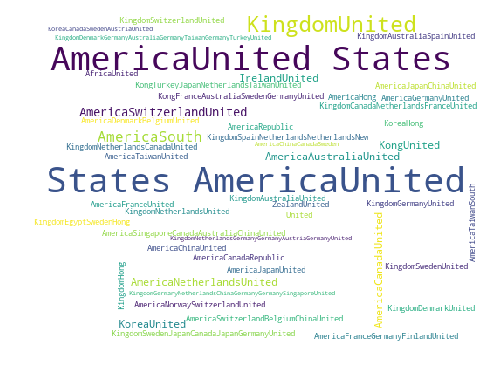

In [38]:
# data preparation
x2011 = timeData.country[timeData.year == 2011]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
    background_color = 'white',
    width = 512,
    height = 384
).generate(''.join(x2011))

plt.imshow(wordcloud)
# 调用imshow()函数实现热图绘制
plt.axis('off')
#不显示坐标尺寸
plt.savefig('graph.png')

plt.show()

## Box Plots

- Median (50th percentile) = middle value of the data set. Sort and take the data in the middle. It is also called 50% percentile that is 50% of data are less that median(50th quartile)(quartile)

    - 25th percentile = quartile 1 (Q1) that is lower quartile
    - 75th percentile = quartile 3 (Q3) that is higher quartile
    - height of box = IQR = interquartile range = Q3-Q1
    - Whiskers = 1.5 * IQR from the Q1 and Q3
    - Outliers = being more than 1.5*IQR away from median commonly.

- trace = box
    - y = data we want to visualize with box plot
    - marker = color

In [39]:
# data preparation
x2015 = timeData[timeData.year == 2015]

trace1 = go.Box(
    y = x2015.total_score,
    name = 'total score of universities in 2015',
    marker = dict(
        color = 'rgb(97,125,211)'
    )
)

trace2 = go.Box(
    y = x2015.research,
    name = 'research of universities in 2015',
    marker = dict(
        color = 'rgb(212,57,145)'
    )
)

data = [trace1, trace2]
iplot(data)

## Scatter Matrix Plots
Scatter Matrix = it helps us to see covariance and relation between more than 2 features   

- import figure factory as ff
- create_scatterplotmatrix = creates scatter plot
    - data2015 = prepared data. It includes research, international and total scores with index from 1 to 401
    - colormap = color map of scatter plot
    - colormap_type = color type of scatter plot
    - height and weight

In [47]:
# import figure factory
import plotly.figure_factory as ff
# prepare data
dataframe = timeData[timeData.year == 2015]
data2015 = dataframe.loc[:,['research', 'international', 'total_score']]
data2015['index'] = np.arange(1, len(data2015)+1)
# data2015.head()

# scatter matrix
fig = ff.create_scatterplotmatrix(data2015, diag='histogram', index='index', 
                                  colormap='Portland', colormap_type='cat',
                                  height=700, width=700)
iplot(fig)

## Inset Plots
Inset Matrix = 2 plots are in one frame

In [60]:
dataframe = timeData[timeData.year == 2014]
# first line plot
trace1 = go.Scatter(
    x = dataframe.world_rank,
    y = dataframe.teaching,
    name = 'teaching',
    marker = dict(color='rgba(62,112,42,0.6)')
)

# second line plot
trace2 = go.Scatter(
    x = dataframe.world_rank,
    y = dataframe.income,
    xaxis = 'x2',  # x2？
    yaxis = 'y2',
    name = 'income',
    marker = dict(color='rgba(160,76,167,0.6)')
)

data = [trace1, trace2]
layout = go.Layout(
    xaxis2 = dict(
        domain = [0.6, 0.95],
        anchor = 'y2'
    ),
    yaxis2 = dict(
        domain = [0.6, 0.95],
        anchor = 'x2'
    ),
    title = 'Income and Teaching vs World Rank of Universities'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

## 3D Scatter Plot with Colorscaling
3D Scatter: Sometimes 2D is not enough to understand data. Therefore adding one more dimension increase the intelligibility of the data. Even we will add color that is actually 4th dimension.     

- go.Scatter3d: create 3d scatter plot
- x,y,z: axis of plots
- mode: market that is scatter
- size: marker size
- color: axis of colorscale
- colorscale: actually it is 4th dimension

In [62]:
# create trace1 that is 3d scatter
trace1 = go.Scatter3d(
    x = dataframe.world_rank,
    y = dataframe.research,
    z = dataframe.citations,
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgb(157,7,155)'
        # set color to an array/list of desired values
    )
)

data = [trace1]
layout = go.Layout(
    margin = dict(
        l = 0,
        r = 0,
        b = 0,
        t = 0
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Multiple Subplots
Multiple Subplots: While comparing more than one features, multiple subplots can be useful.

In [67]:
trace1 = go.Scatter(
    x = dataframe.world_rank,
    y = dataframe.research,
    name = 'research'
)

trace2 = go.Scatter(
    x = dataframe.world_rank,
    y = dataframe.citations,
    xaxis = 'x2',  # 标明设置一个不同于trace1的一个坐标轴
    yaxis = 'y2',
    name = 'citations'
) 

trace3 = go.Scatter(
    x = dataframe.world_rank,
    y = dataframe.income,
    xaxis = 'x3',
    yaxis = 'y3',
    name = 'income'
)

trace4 = go.Scatter(
    x = dataframe.world_rank,
    y = dataframe.total_score,
    xaxis = 'x4',
    yaxis = 'y4',
    name = 'total_score'
)

data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis = dict(
        domain = [0, 0.45]
    ),
    yaxis = dict(
        domain = [0, 0.45]
    ),
    xaxis2 = dict(
        domain = [0.55, 1],
       # anchor = 'x2'   
    ),
    yaxis2 = dict(
        domain = [0, 0.45],
        anchor = 'x2'  
    ),
    xaxis3 = dict(
        domain = [0, 0.45],
        anchor = 'y3'  # 设置坐标轴的格式，一般次坐标轴在右侧
    ),
    yaxis3 = dict(
        domain = [0.55, 1],
        # anchor = 'y3'
    ),
    xaxis4 = dict(
        domain = [0.55, 1],
        anchor = 'y4'
    ),
    yaxis4 = dict(
        domain = [0.55, 1],
        anchor = 'x4'
    ),
    title = 'Research, citation, income and total score VS World Rank of Universities'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)